In [37]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

In [26]:
batch_size = 64

In [27]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size)

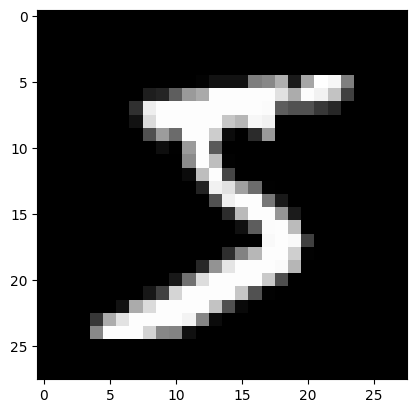

In [28]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

In [29]:
train_dataset[0][0][0].shape

torch.Size([28, 28])

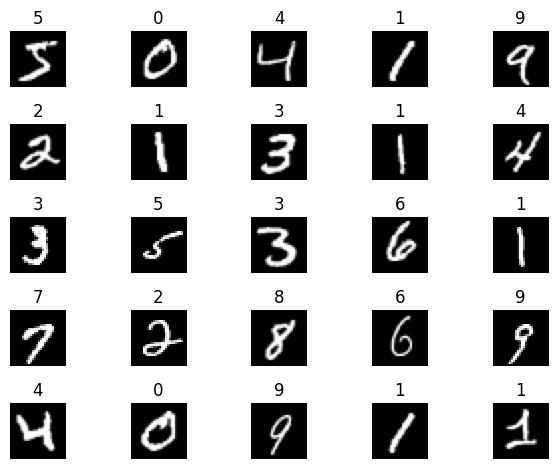

In [30]:
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')
  
plt.tight_layout()
plt.show()

In [31]:
test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64
)

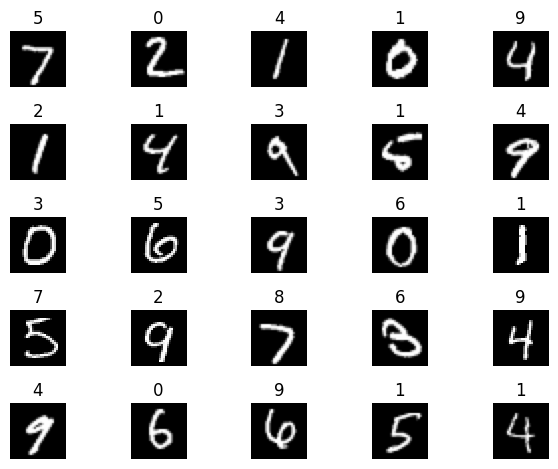

In [32]:
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(test_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')
  
plt.tight_layout()
plt.show()

In [33]:
class MNISTDeepAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28)
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

In [38]:
model = MNISTDeepAutoencoder()
loss = nn.MSELoss()
n_epochs = 2
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [39]:
train_loss = []
for epoch in range(n_epochs):
    with tqdm(train_loader, unit="batch") as tepoch:

        running_loss = 0

        for imgs_batch, _ in tepoch:
            tepoch.set_description(f"Epoch {epoch}")
            imgs_batch = imgs_batch.reshape(-1, 28*28)

            # forward pass
            out = model(imgs_batch)

            # loss
            loss_batch = loss(out, imgs_batch)

            opt.zero_grad()
            loss_batch.backward()
            opt.step()

            running_loss += loss_batch.item()

        running_loss /= batch_size
        train_loss.append(running_loss)
        tepoch.set_postfix(loss=loss.item())


Epoch 0: 100%|██████████| 938/938 [00:07<00:00, 124.46batch/s]


AttributeError: 'MSELoss' object has no attribute 'item'